In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix #For observing the confusion matrix
from sklearn.linear_model import LogisticRegression #For logistic regression
from sklearn.model_selection import train_test_split,GridSearchCV #For train test split
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score #For detailed classification report
from imblearn.over_sampling import SMOTE #for oversampling of data
from sklearn.preprocessing import StandardScaler #for scaling of data
from sklearn.neighbors import KNeighborsClassifier #KNN model
from sklearn.tree import DecisionTreeClassifier #Decision tree model
import seaborn as sns

In [2]:
df = pd.read_csv("creditcard.csv")

# Data Exploration

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().values.any() #check for missing data

False

No missing data detected

In [6]:
temp = df["Class"].value_counts()

In [7]:
temp

0    284315
1       492
Name: Class, dtype: int64

In [8]:
test_df = pd.DataFrame({'Class': temp.index,'values': temp.values})

In [9]:
test_df

,Class,values
0,0,284315
1,1,492


In [10]:
value_sum=test_df["values"].sum()

In [11]:
value_nf=test_df["values"][0]

In [12]:
value_f=test_df["values"][1]

In [13]:
print("Percentage of fraud data in dataset =", round(value_f/value_sum*100,3),"%") #showing that the data is highly imbalanced

Percentage of fraud data in dataset = 0.173 %


# Visualization of raw data

This step is to allow us to understand what type of methods we should use for data cleaning

C:\Users\bsmat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

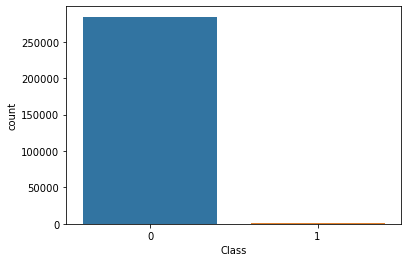

In [14]:
sns.countplot("Class",data=df,palette="tab10") #representation of data imbalance (0 is not fraudulent, 1 is fraudulent)

Data is found to be heavily imbalanced, actions required

C:\Users\bsmat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time', ylabel='Density'>

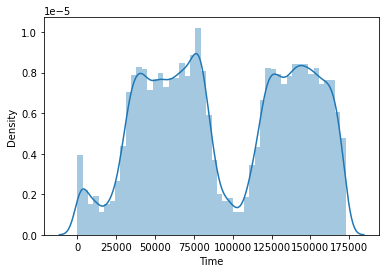

In [15]:
sns.distplot(df["Time"])

C:\Users\bsmat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\bsmat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of transaction time')

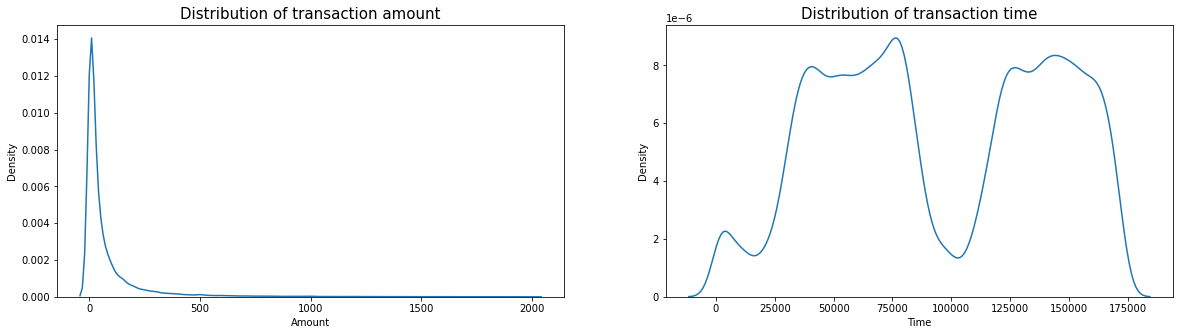

In [16]:
df_new=df[df["Amount"]<2000] #removing extreme values of high amounts to make the graph more readable
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.distplot(df_new["Time"], ax=ax[1],hist=False)
sns.distplot(df_new["Amount"], ax=ax[0],hist=False)
ax[0].set_title("Distribution of transaction amount", fontsize=15)
ax[1].set_title("Distribution of transaction time", fontsize=15)

In [17]:
df1 = df_new[df_new['Class'] < 1]
df2 = df_new[df_new['Class'] ==1] #splitting up data frame into fraud and not fraud

C:\Users\bsmat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\bsmat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bsmat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

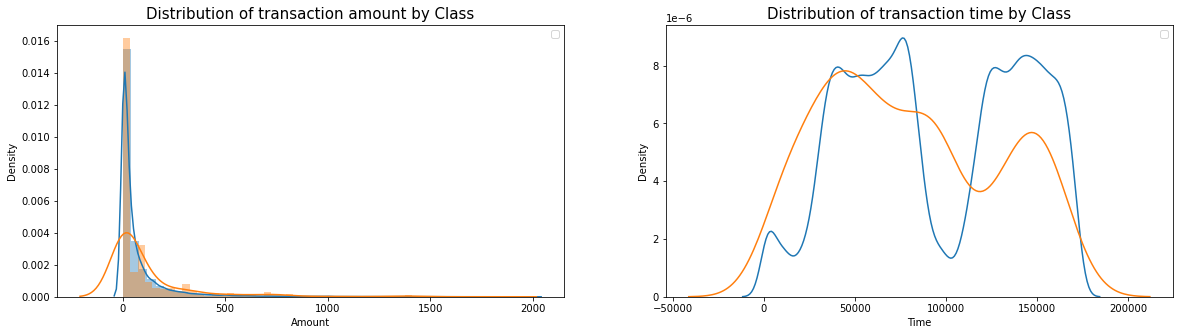

In [18]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.distplot(df1["Time"], ax=ax[1],hist=False)
sns.distplot(df1["Amount"], ax=ax[0])
sns.distplot(df2["Time"], ax=ax[1],hist=False)
sns.distplot(df2["Amount"], ax=ax[0])
ax[0].set_title("Distribution of transaction amount by Class", fontsize=15)
ax[1].set_title("Distribution of transaction time by Class", fontsize=15)
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

Distribution of fraudulant transactions are more varied in terms of transaction amounts.

# Data Cleaning method 1 (Random under sampling)

Since there are only 492 fraudulant transactions in the dataframe, we randomly select 492 samples from non-fraudulant transactions to create a sample that is 50/50 for both Class 1 and Class 0

In [19]:
x=df2["Class"].count() #random under sampling to make the imbalanced data become 50/50 fraud and not fraud
df1_under=df1.sample(x)
df_under=pd.concat([df1_under,df2])
df_under.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,...,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000
mean,87036.381874,-2.462280,1.878319,-3.548394,2.261589,-1.569523,-0.689773,-2.807320,0.311243,-1.270563,...,0.374329,0.014336,-0.019277,-0.043358,0.035153,0.024278,0.087083,0.034334,95.683259,0.500000
std,48467.420894,5.564689,3.717425,6.232403,3.218409,4.211595,1.765935,5.841809,4.891248,2.342656,...,2.806566,1.176743,1.179159,0.557005,0.667947,0.471855,1.019076,0.437801,198.808947,0.500255
min,100.000000,-30.552380,-19.594650,-31.103685,-4.190266,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-3.529290,0.000000,0.000000
25%,45472.500000,-3.039966,-0.080119,-5.139816,-0.118856,-1.723501,-1.568882,-3.104310,-0.202248,-2.289099,...,-0.160495,-0.532045,-0.234500,-0.379013,-0.300786,-0.278128,-0.066423,-0.055333,1.495000,0.000000
50%,79562.500000,-0.846862,1.011281,-1.359936,1.349933,-0.393248,-0.653018,-0.626928,0.167874,-0.694180,...,0.164110,0.032148,-0.031389,0.007570,0.079108,-0.033590,0.048315,0.035385,16.545000,0.500000
75%,134601.750000,1.028331,2.921927,0.324914,4.240590,0.472953,0.096328,0.267575,0.884280,0.184658,...,0.650170,0.597007,0.195366,0.373263,0.403168,0.305499,0.462166,0.218938,99.990000,1.000000
max,172411.000000,2.278398,22.057729,3.213987,12.114672,11.095089,6.474115,5.802537,20.007208,6.750766,...,27.202839,8.361985,5.466230,1.108748,2.208209,2.745261,3.685950,1.779364,1809.680000,1.000000


C:\Users\bsmat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

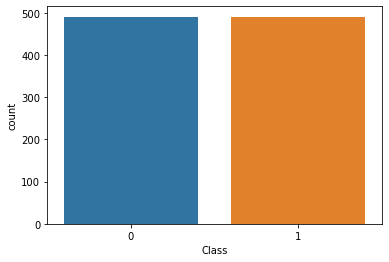

In [20]:
sns.countplot("Class",data=df_under,palette="tab10") #representation of new balanced data (0 is not fraudulent, 1 is fraudulent)

The sample is now balanced

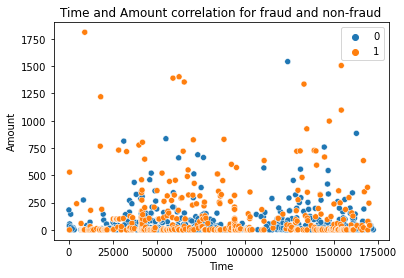

In [21]:
sns.scatterplot(data=df_under, x="Time",y="Amount",hue="Class")
plt.title("Time and Amount correlation for fraud and non-fraud")
plt.legend(loc="upper right")

Text(0.5, 1.0, 'Comparing distributions of Amounts by Class')

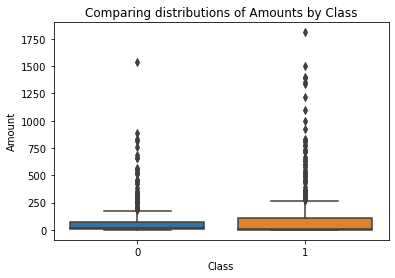

In [22]:
sns.boxplot(x="Class",y="Amount",data=df_under)
plt.title("Comparing distributions of Amounts by Class")

We previously removed some extreme values from amount so this check is to confirm that

Text(0.5, 1.0, 'Comparing distribution of Time by Class')

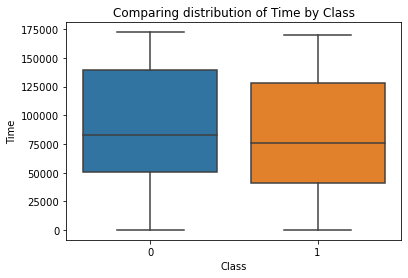

In [23]:
sns.boxplot(x="Class",y="Time",data=df_under)
plt.title("Comparing distribution of Time by Class")

<AxesSubplot:>

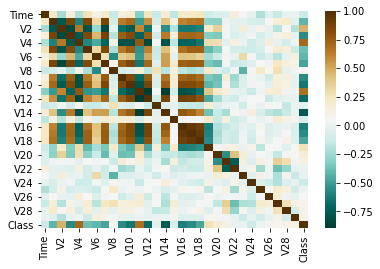

In [24]:
df_under_corr=df_under.corr()
sns.heatmap(data=df_under_corr, cmap="BrBG_r") #Finding correlation of variables


Notable positive correlation to fraud:V2,V4,V11
Notable neagtive correlation to fraud:V3,V10,V12,V14

This information could be useful for model building if we aim to create a more efficient model by just looking at the variables with the greatest impact on determining class

Text(0.5, 1.0, 'Correlation of V11 with Class')

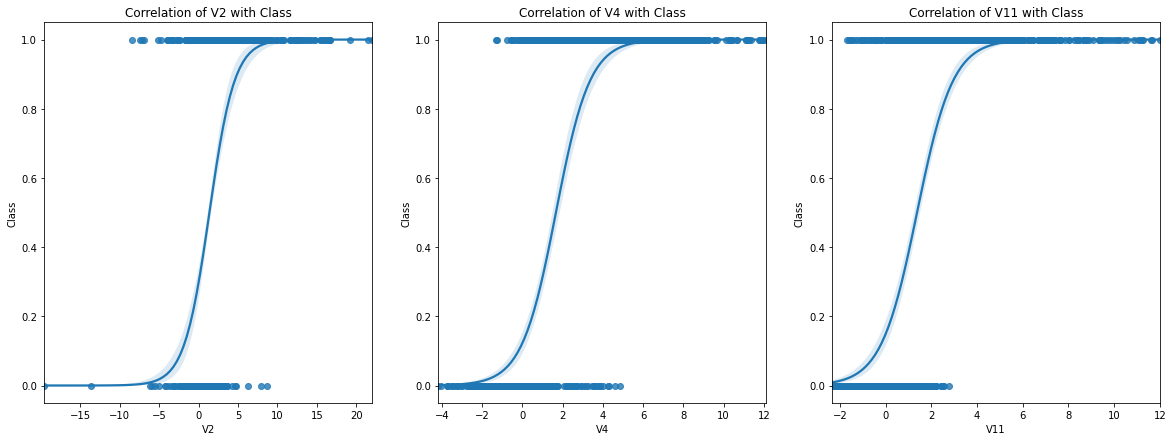

In [25]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,7)) #Visualising positive correlation variables with a logistic regression plot
sns.regplot(y="Class",x="V2",data=df_under,ax=ax1,logistic=True)
sns.regplot(y="Class",x="V4",data=df_under,ax=ax2,logistic=True)
sns.regplot(y="Class",x="V11",data=df_under,ax=ax3,logistic=True)
ax1.set_title("Correlation of V2 with Class")
ax2.set_title("Correlation of V4 with Class")
ax3.set_title("Correlation of V11 with Class")

Visualization of Positive Correlation graphs

Text(0.5, 1.0, 'Correlation of V14 with Class')

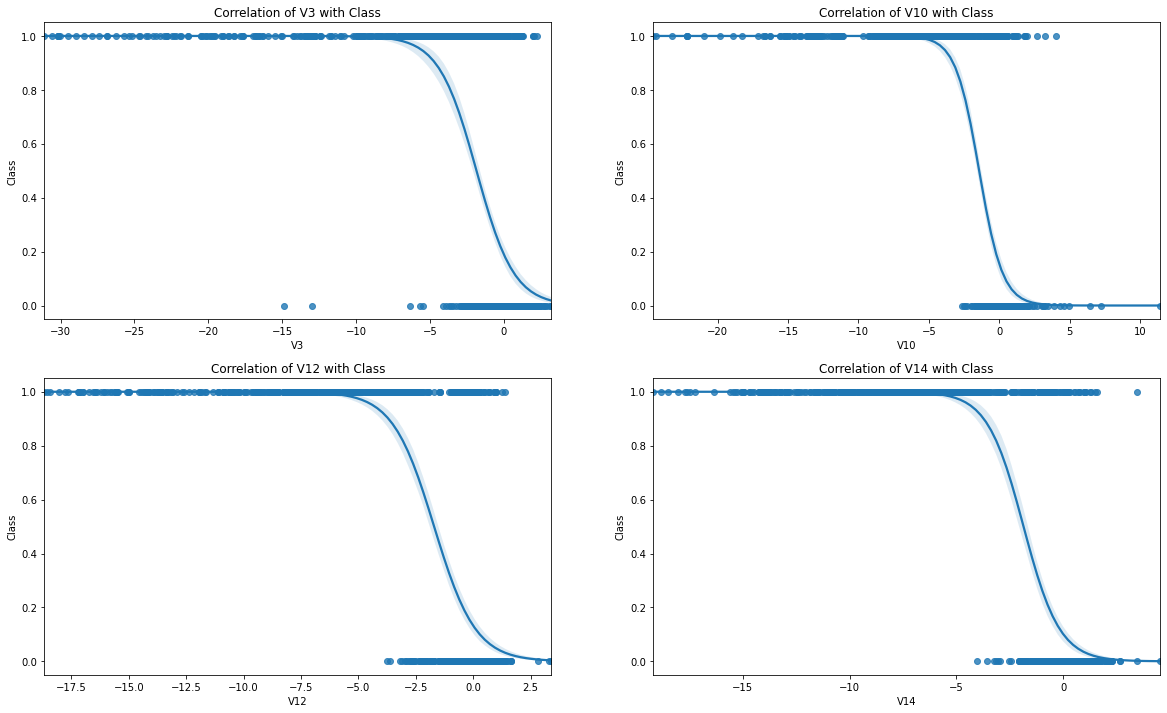

In [26]:
fig,ax = plt.subplots(2,2, figsize=(20,12)) #Visualising negative correlation variables with logistic regression plot
sns.regplot(y="Class",x="V3",data=df_under,ax=ax[0][0],logistic=True)
sns.regplot(y="Class",x="V10",data=df_under,ax=ax[0][1],logistic=True)
sns.regplot(y="Class",x="V12",data=df_under,ax=ax[1][0],logistic=True)
sns.regplot(y="Class",x="V14",data=df_under,ax=ax[1][1],logistic=True)
ax[0][0].set_title("Correlation of V3 with Class")
ax[0][1].set_title("Correlation of V10 with Class")
ax[1][0].set_title("Correlation of V12 with Class")
ax[1][1].set_title("Correlation of V14 with Class")

Visualization of Negative Correlation graphs

# ML model 1: Logistic Regression using random under sampling

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df_under.drop("Class",axis=1), df_under["Class"])

C:\Users\bsmat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

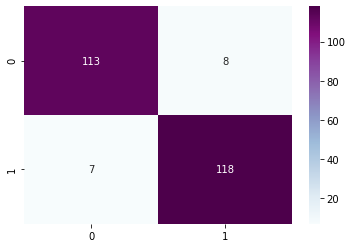

In [28]:
LogReg=LogisticRegression()
LogReg.fit(x_train,y_train)
y_pred = LogReg.predict(x_test)
log_reg_cf=confusion_matrix(y_test, y_pred)
sns.heatmap(log_reg_cf,annot=True,cmap="BuPu",fmt='g')

Steps taken:
1) Train-test split
2) Fit training data to logistic regression model
3) Predict test data using fitted model
4) Compare results using confusion matrix, which is visualized using a heatmap

In [29]:
print("Accuracy for Undersampling Logistic Regression =", roc_auc_score(y_test,y_pred))

Accuracy for Undersampling Logistic Regression = 0.9389421487603306


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       121
           1       0.94      0.94      0.94       125

    accuracy                           0.94       246
   macro avg       0.94      0.94      0.94       246
weighted avg       0.94      0.94      0.94       246



# Data Cleaning method 2 (SMOTE/Over-sampling)

In [31]:
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df_alt = df.drop(['Time', 'Amount'], axis=1)
df_alt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Scaling the column "Amount" so that it can also be used in the models as the raw data of Amounts is not appropriate.
"Time" is also not an appropriate column, these 2 columns can be dropped from the model to prevent inaccuracies.

In [32]:
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(df_alt.drop("Class",axis=1), df_alt["Class"],random_state=1)
sm = SMOTE(random_state=1)
x_train_smote, y_train_smote = sm.fit_resample(x_train_smote, y_train_smote.ravel())

Over-sampling using SMOTE along with the train test split

# ML model 2: Logistic Regression using SMOTE/Over-sampling

<AxesSubplot:>

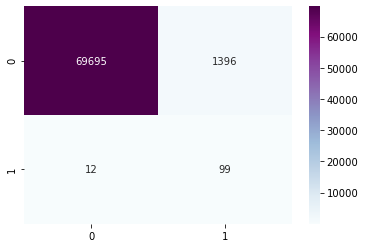

In [33]:
LogReg=LogisticRegression()
LogReg.fit(x_train_smote,y_train_smote)
y_pred_smote=LogReg.predict(x_test_smote)
log_reg_cf_smote=confusion_matrix(y_test_smote,y_pred_smote)
sns.heatmap(log_reg_cf_smote,annot=True,cmap="BuPu",fmt='g')

Same process as the first logistic regression

In [34]:
print("Accuracy for Oversampling Logistic Regression using SMOTE =", roc_auc_score(y_test_smote,y_pred_smote))

Accuracy for Oversampling Logistic Regression using SMOTE = 0.9361275441791963


In [35]:
print(classification_report(y_test_smote, y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71091
           1       0.07      0.89      0.12       111

    accuracy                           0.98     71202
   macro avg       0.53      0.94      0.56     71202
weighted avg       1.00      0.98      0.99     71202



# ML Model 3: K-Nearest Neighbours

In [36]:
knn=KNeighborsClassifier(n_neighbors=4)

In [37]:
knn.fit(x_train_smote,y_train_smote)

KNeighborsClassifier(n_neighbors=4)

In [38]:
ypred=knn.predict(x_test_smote)

Steps taken:

1) Use the same train-test split for SMOTE
2) Fit data to model
3) Predict data using the model

Note: n_neighbors=4 was chosen at random initially as running this code took a lot of time and was highly inefficient due to the number of dimensions. A forloop should ideally be used to determine which of the values of n_neighbors gives the highest accuracy result. Modifications to this code is still ongoing to improve efficiency of the models.

In [39]:
print(classification_report(y_test_smote,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.54      0.78      0.64       111

    accuracy                           1.00     71202
   macro avg       0.77      0.89      0.82     71202
weighted avg       1.00      1.00      1.00     71202



<AxesSubplot:>

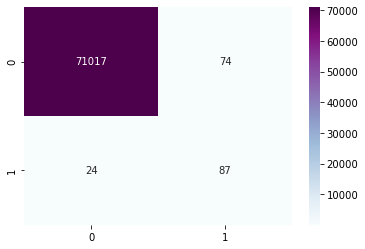

In [40]:
cf_knn=confusion_matrix(y_test_smote,ypred)
sns.heatmap(cf_knn,annot=True,cmap="BuPu",fmt='g')

Confusion matrix can also be used to check for accuracy with this model

In [41]:
print("Accuracy for K-Nearest Neighbors Classifier =", roc_auc_score(y_test_smote,ypred))

Accuracy for K-Nearest Neighbors Classifier = 0.891371432199385


# ML Model 4: Decision Tree Classifier

In [42]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train_smote,y_train_smote)
y_pred_dtc = dtc.predict(x_test_smote)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.41      0.74      0.53       111

    accuracy                           1.00     71202
   macro avg       0.70      0.87      0.76     71202
weighted avg       1.00      1.00      1.00     71202



<AxesSubplot:>

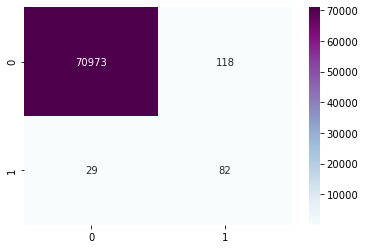

In [43]:
print(classification_report(y_test_smote,y_pred_dtc))
cf_dtc=confusion_matrix(y_test_smote,y_pred_dtc)
sns.heatmap(cf_dtc,annot=True,cmap="BuPu",fmt='g')

Similar steps are taken as the KNN model. The train-test split from SMOTE is also used for this model.

In [44]:
print("Accuracy for Decision Tree Classifier =", roc_auc_score(y_test_smote,y_pred_dtc))

Accuracy for Decision Tree Classifier = 0.8685394471569937


The most accurate model found is logistic regression, both over-sampling and under-sampling give similar results of over 90% but may vary depending on randomization factor of the samples.